In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [3]:
file_path = './AgricultureData.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,b12c721e-8301-4b08-8ac3-d435be9b8b32,Lamb,Livestock,14.10,19224,14905,4319,Organic Meats Co.,"O'Reillyboro, OR",2022-07-04
1,4a0f8862-c851-4073-bc17-3a3d93834902,Beef,Livestock,11.37,29504,4550,24954,Organic Meats Co.,"Lake Nora, AR",2023-10-21
2,be996df6-1780-4352-8b7d-1f927279aa49,Oranges,Fruits,2.59,1838,1722,116,Berry Fields,"East Friedaside, NM",2023-12-24
3,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,6750,1232,5518,Fresh Dairy Farms,"East Javon, FL",2023-12-25
4,0bd5bf2b-be0a-4ba0-aa92-059021b169e3,Bananas,Fruits,1.78,48729,47020,1709,Golden Orchards,"Lake D'angelo, MN",2023-06-20


In [5]:
df_cleaned = df.dropna()

In [6]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [7]:
filtered_data = df[df['category'].str.lower().isin(['vegetables', 'fruits'])]

# Display the filtered data
filtered_data.to_excel('fruits_and_vegetables.xlsx', index=False)
print("Data of fruits and vegetables has been saved to 'fruits_and_vegetables.xlsx'.")


Data of fruits and vegetables has been saved to 'fruits_and_vegetables.xlsx'.


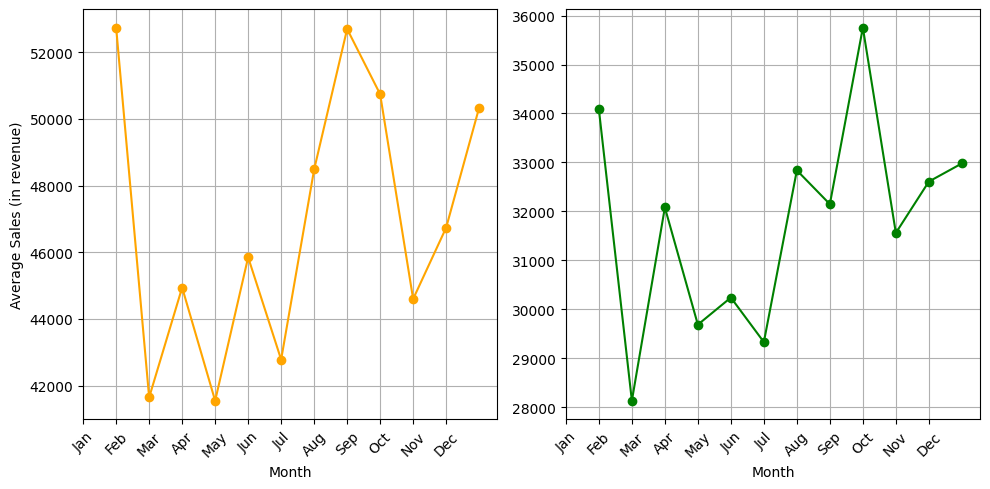

In [10]:
filtered_data['month'] = filtered_data['sale_date'].dt.month
filtered_data['total_revenue'] = filtered_data['price_per_kg'] * filtered_data['units_sold_kg']; 
fruits_data = filtered_data[filtered_data['category'].str.lower() == 'fruits']
vegetables_data = filtered_data[filtered_data['category'].str.lower() == 'vegetables']

fruits_monthly_trend = fruits_data.groupby('month')['total_revenue'].mean()
vegetables_monthly_trend = filtered_data.groupby('month')['total_revenue'].mean()
#print(monthly_trend)

# monthly_trend.plot(kind='bar', title= 'Average Monthly Sales of Fruits and Vegetables', color='green')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(fruits_monthly_trend, marker='o', linestyle='-', color='orange', label='Fruits')
plt.xlabel('Month')
plt.ylabel('Average Sales (in revenue)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(vegetables_monthly_trend, marker='o', linestyle='-', color='green', label='Vegetables')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

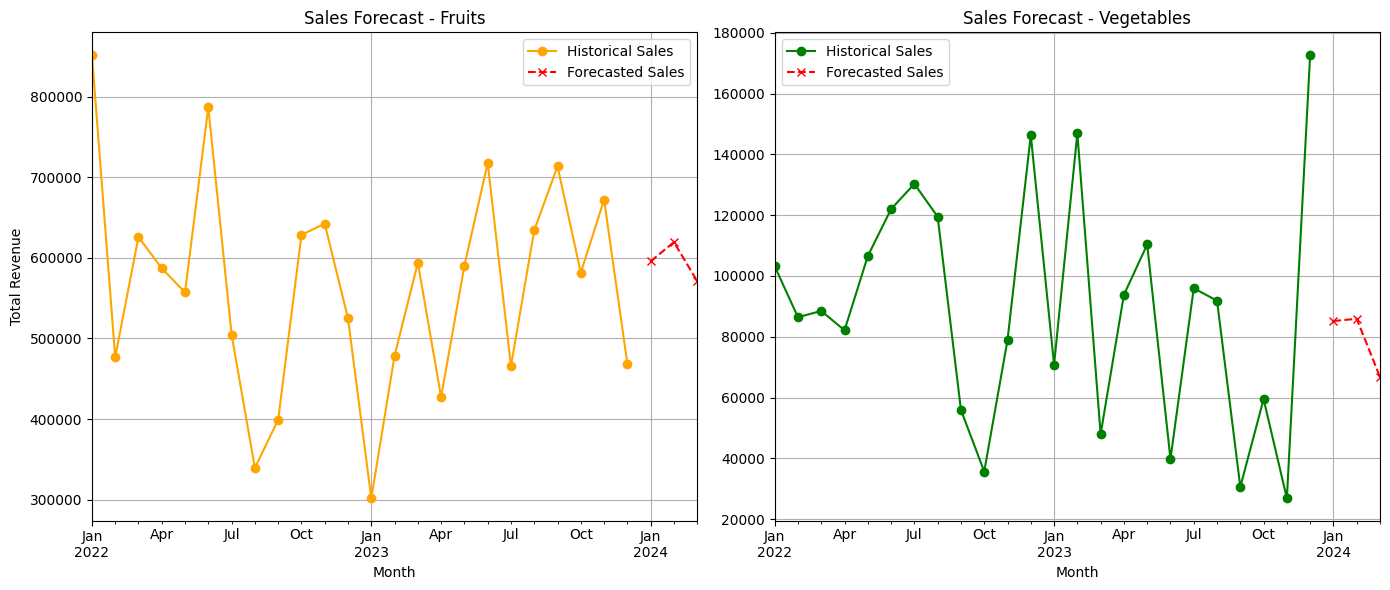

In [11]:
fruits = ['oranges', 'mangoes', 'bananas']  # Add more fruit names as needed
vegetables = ['maize', 'spinach', 'cabbage']  # Add more vegetable names as needed

fruits_data = filtered_data[(filtered_data['category'].str.lower() == 'fruits') &
    (filtered_data['product_name'].str.lower().isin(fruits))
]
vegetables_data = filtered_data[(filtered_data['category'].str.lower() == 'vegetables') &
    (filtered_data['product_name'].str.lower().isin(vegetables))
]

fruits_monthly_sales = fruits_data.groupby(fruits_data['sale_date'].dt.to_period('M'))['total_revenue'].sum()
vegetables_monthly_sales = vegetables_data.groupby(vegetables_data['sale_date'].dt.to_period('M'))['total_revenue'].sum()


fruits_model = ARIMA(fruits_monthly_sales, order=(5, 1, 0)).fit()
vegetables_model = ARIMA(vegetables_monthly_sales, order=(5, 1, 0)).fit()

fruits_forecast = fruits_model.forecast(steps=3)
vegetables_forecast = vegetables_model.forecast(steps=3)

# Step 4: Plot the historical and forecasted sales for fruits and vegetables

plt.figure(figsize=(14, 6))

# Plot for Fruits
plt.subplot(1, 2, 1)
fruits_monthly_sales.plot(label='Historical Sales', legend=True, marker='o', color='orange')
fruits_forecast.plot(label='Forecasted Sales', legend=True, marker='x', linestyle='--', color='red')
plt.title('Sales Forecast - Fruits')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Plot for Vegetables
plt.subplot(1, 2, 2)
vegetables_monthly_sales.plot(label='Historical Sales', legend=True, marker='o', color='green')
vegetables_forecast.plot(label='Forecasted Sales', legend=True, marker='x', linestyle='--', color='red')
plt.title('Sales Forecast - Vegetables')
plt.xlabel('Month')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()